<a href="https://colab.research.google.com/github/votamvan/cs582/blob/master/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Tam Van Vo, ID: 610746   
Reference: https://keras.io/examples/mnist_cnn/   

<h2>Assignment Keras-MNIST</h2>

In [0]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

### Load Fashion MNIST dataset

In [15]:
mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


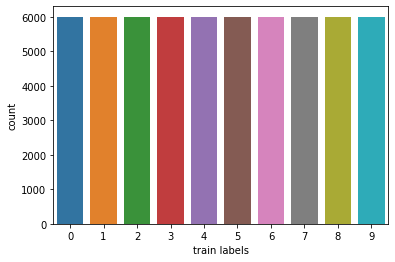

In [16]:
ax = sns.countplot(train_labels)
t = ax.set_xlabel("train labels")

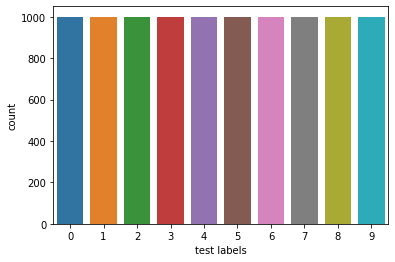

In [17]:
ax = sns.countplot(test_labels)
t = ax.set_xlabel("test labels")

#### Preview the images first

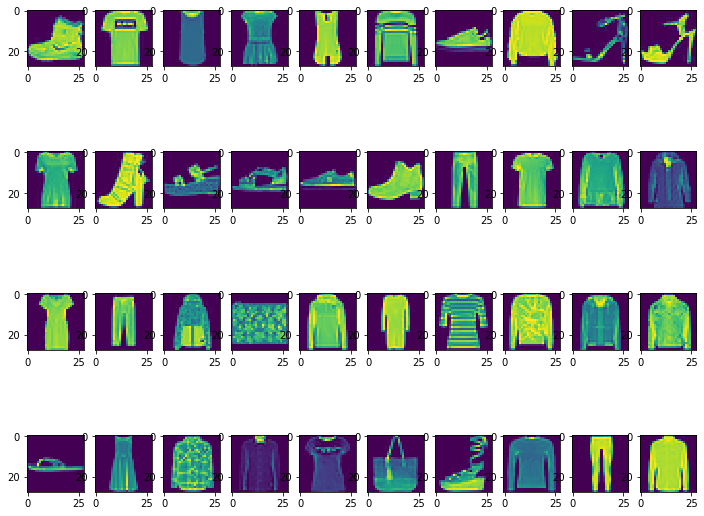

In [18]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i].reshape((28,28)),interpolation='nearest')
plt.show()

#### Create CNN model

In [19]:
inp = (train_images[0].shape[0], train_images[0].shape[1], 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inp))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

#### Train and evaluate model

In [20]:
batch_size = 16
num_classes = 10
epochs = 10

x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)/255
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)/255
y_train, y_test = train_labels, test_labels
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.4556 - accuracy: 0.8452 - val_loss: 0.3201 - val_accuracy: 0.8888
Epoch 2/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.3224 - accuracy: 0.8899 - val_loss: 0.2740 - val_accuracy: 0.9029
Epoch 3/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.2914 - accuracy: 0.9008 - val_loss: 0.2588 - val_accuracy: 0.9069
Epoch 4/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.2681 - accuracy: 0.9082 - val_loss: 0.2439 - val_accuracy: 0.9156
Epoch 5/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.2528 - accuracy: 0.9135 - val_loss: 0.2496 - val_accuracy: 0.9117
Epoch 6/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.2402 - accuracy: 0.9192 - val_loss: 0.2533 - val_accuracy: 0.9115
Epoch 7/10
60000/60000 [==============================] 

#### Plot learning curve

[]

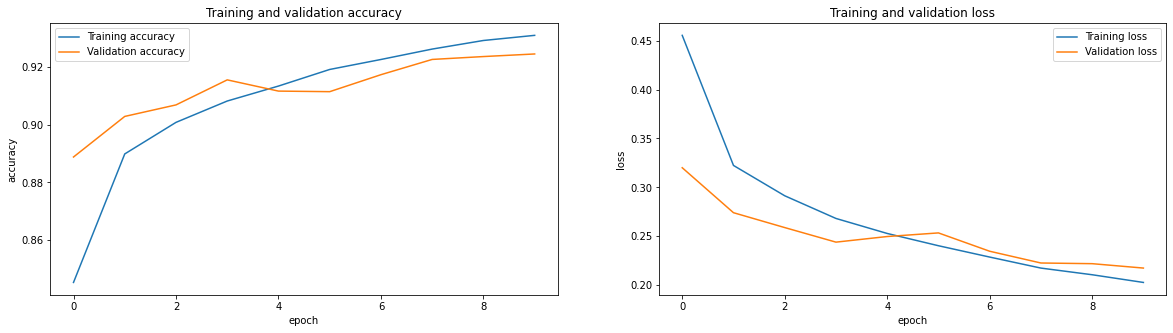

In [21]:
# summarize history for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend()

# summarize history for loss
ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend()
plt.plot()

#### Report accuracy

In [22]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_labels, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.87      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.90      0.88      1000
       Dress       0.91      0.94      0.92      1000
        Coat       0.89      0.85      0.87      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.78      0.79      0.78      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

